In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

TEST_RESULT_CSV = "./test_result.csv"



In [40]:
# Load the CSV file
df = pd.read_csv(TEST_RESULT_CSV)
print(f"Total number of test cases: {len(df)}")
print(f"\nFirst few rows:")
df.head(10)


Total number of test cases: 1968

First few rows:


,Actual,Predicted,Distance
0,8xbs5m1,8xbs5m1,0
1,lu1ow7k,iu1ow7k,1
2,ol8l2s,0l8t2s,2
3,8cmn,6cmn,1
4,rfg39h87,rfg39h87,0
5,ciixax,ciixkx,1
6,97vl,97vl,0
7,6umph5p0,6umph5p0,0
8,911qxoxi,91qxoxi,1
9,v7cb2d,yzcb2d,2


In [41]:
# Count of each distance value
distance_counts = df['Distance'].value_counts().sort_index()
print("Distance Distribution:")
print(distance_counts)
print(f"\nTotal: {distance_counts.sum()}")


Distance Distribution:
Distance
0     671
1     480
2     318
3     197
4     121
5      68
6      36
7      25
8      17
9       8
10     11
11      4
12      2
13      4
14      1
16      1
17      1
18      1
21      1
26      1
Name: count, dtype: int64

Total: 1968


In [42]:
# Calculate statistics
total = len(df)
perfect_matches = len(df[df['Distance'] == 0])
accuracy = perfect_matches / total * 100
avg_distance = df['Distance'].mean()
median_distance = df['Distance'].median()
max_distance = df['Distance'].max()

print("Performance Statistics:")
print(f"Total test cases: {total}")
print(f"Perfect matches (Distance = 0): {perfect_matches} ({accuracy:.2f}%)")
print(f"Average distance: {avg_distance:.2f}")
print(f"Median distance: {median_distance:.2f}")
print(f"Maximum distance: {max_distance}")
print(f"Minimum distance: {df['Distance'].min()}")


Performance Statistics:
Total test cases: 1968
Perfect matches (Distance = 0): 671 (34.10%)
Average distance: 1.76
Median distance: 1.00
Maximum distance: 26
Minimum distance: 0


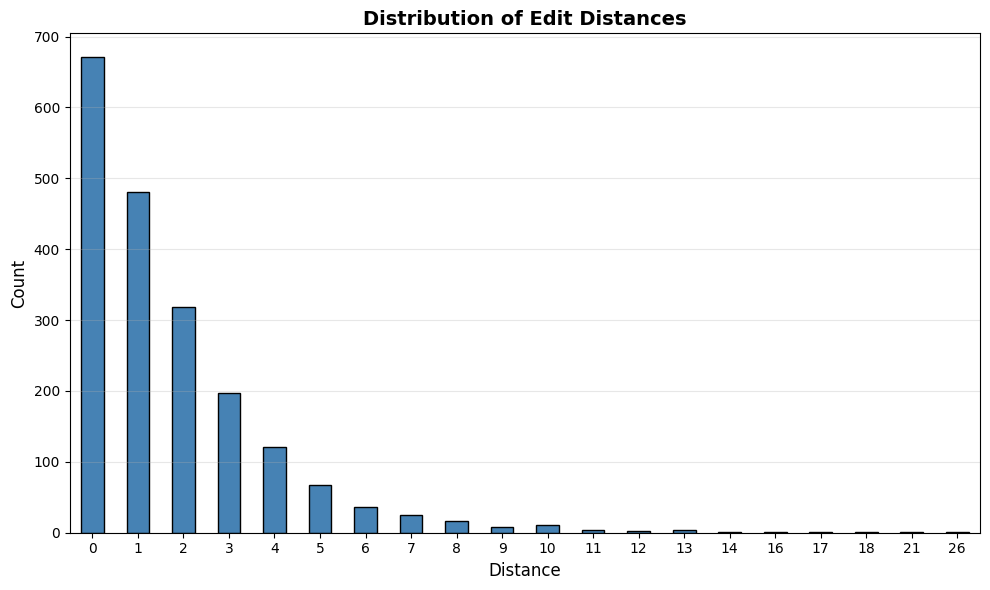

In [43]:
# Visualize distance distribution
plt.figure(figsize=(10, 6))
distance_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Distribution of Edit Distances', fontsize=14, fontweight='bold')
plt.xlabel('Distance', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [44]:
# Show examples for each distance value
print("Examples for each distance value:\n")
for dist in sorted(df['Distance'].unique()):
    examples = df[df['Distance'] == dist].head(5)
    print(f"Distance = {dist} ({len(df[df['Distance'] == dist])} cases):")
    for idx, row in examples.iterrows():
        print(f"  Actual: {row['Actual']:15s} | Predicted: {row['Predicted']:15s}")
    print()


Examples for each distance value:

Distance = 0 (671 cases):
  Actual: 8xbs5m1         | Predicted: 8xbs5m1        
  Actual: rfg39h87        | Predicted: rfg39h87       
  Actual: 97vl            | Predicted: 97vl           
  Actual: 6umph5p0        | Predicted: 6umph5p0       
  Actual: 74d5nqg7        | Predicted: 74d5nqg7       

Distance = 1 (480 cases):
  Actual: lu1ow7k         | Predicted: iu1ow7k        
  Actual: 8cmn            | Predicted: 6cmn           
  Actual: ciixax          | Predicted: ciixkx         
  Actual: 911qxoxi        | Predicted: 91qxoxi        
  Actual: 2gslhci         | Predicted: 2gsthci        

Distance = 2 (318 cases):
  Actual: ol8l2s          | Predicted: 0l8t2s         
  Actual: v7cb2d          | Predicted: yzcb2d         
  Actual: p13ix           | Predicted: pt3tx          
  Actual: ble2            | Predicted: blcj2          
  Actual: sojq            | Predicted: jbjq           

Distance = 3 (197 cases):
  Actual: e2yb5pxs        | Predi

In [45]:
# Additional analysis: Length analysis
df['Actual_Length'] = df['Actual'].str.len()
df['Predicted_Length'] = df['Predicted'].str.len()
df['Length_Diff'] = df['Predicted_Length'] - df['Actual_Length']

print("Length Analysis:")
print(f"Average actual length: {df['Actual_Length'].mean():.2f}")
print(f"Average predicted length: {df['Predicted_Length'].mean():.2f}")
print(f"\nLength difference distribution:")
print(df['Length_Diff'].value_counts().sort_index())


Length Analysis:
Average actual length: 6.00
Average predicted length: 6.34

Length difference distribution:
Length_Diff
-6        1
-5        1
-4        3
-3       14
-2       47
-1      146
 0     1340
 1      199
 2       91
 3       51
 4       29
 5       12
 6       17
 7        6
 8        1
 9        3
 10       3
 12       1
 13       1
 16       1
 19       1
Name: count, dtype: int64


Correlation between actual length and distance: 0.154


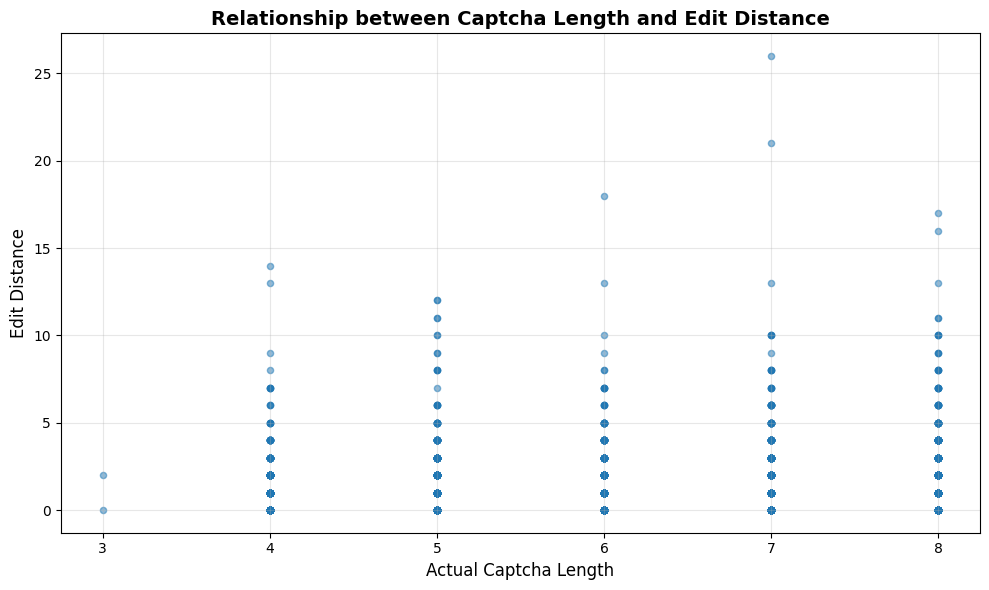

In [46]:
# Correlation between length and distance
correlation = df['Actual_Length'].corr(df['Distance'])
print(f"Correlation between actual length and distance: {correlation:.3f}")

plt.figure(figsize=(10, 6))
plt.scatter(df['Actual_Length'], df['Distance'], alpha=0.5, s=20)
plt.xlabel('Actual Captcha Length', fontsize=12)
plt.ylabel('Edit Distance', fontsize=12)
plt.title('Relationship between Captcha Length and Edit Distance', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [47]:
# Calculate comprehensive model scores
from difflib import SequenceMatcher

def calculate_character_accuracy(actual, predicted):
    """Calculate character-level accuracy using longest common subsequence"""
    if len(actual) == 0 and len(predicted) == 0:
        return 1.0
    if len(actual) == 0 or len(predicted) == 0:
        return 0.0
    
    # Use SequenceMatcher to find matching characters
    matcher = SequenceMatcher(None, actual, predicted)
    matches = sum(block.size for block in matcher.get_matching_blocks())
    max_len = max(len(actual), len(predicted))
    return matches / max_len if max_len > 0 else 0.0

# Calculate metrics
total = len(df)

# 1. Exact Match Accuracy (String-level accuracy)
exact_matches = len(df[df['Distance'] == 0])
exact_match_accuracy = exact_matches / total

# 2. Character-level Accuracy
char_accuracies = []
for idx, row in df.iterrows():
    char_acc = calculate_character_accuracy(row['Actual'], row['Predicted'])
    char_accuracies.append(char_acc)
df['Char_Accuracy'] = char_accuracies
character_accuracy = np.mean(char_accuracies)

# 3. Normalized Edit Distance (accounts for string length)
df['Max_Length'] = df[['Actual_Length', 'Predicted_Length']].max(axis=1)
df['Normalized_Distance'] = df['Distance'] / df['Max_Length'].replace(0, 1)  # Avoid division by zero
normalized_median_distance = df['Normalized_Distance'].median()  # Use median to avoid skew from outliers
normalized_mean_distance = df['Normalized_Distance'].mean()  # Keep mean for reference

# 4. Levenshtein Similarity Score (1 - normalized distance)
df['Similarity_Score'] = 1 - df['Normalized_Distance']
avg_similarity = df['Similarity_Score'].mean()

# 5. Precision and Recall (Character-level)
def calculate_precision_recall(actual, predicted):
    """Calculate precision and recall at character level"""
    if len(predicted) == 0:
        return (0.0, 0.0) if len(actual) > 0 else (1.0, 1.0)
    if len(actual) == 0:
        return (0.0, 1.0) if len(predicted) > 0 else (1.0, 1.0)
    
    # Use SequenceMatcher to find matching characters
    matcher = SequenceMatcher(None, actual, predicted)
    matches = sum(block.size for block in matcher.get_matching_blocks())
    
    # Precision: correct characters / total predicted characters
    precision = matches / len(predicted) if len(predicted) > 0 else 0.0
    
    # Recall: correct characters / total actual characters
    recall = matches / len(actual) if len(actual) > 0 else 0.0
    
    return precision, recall

# Calculate precision and recall for each prediction
precisions = []
recalls = []
for idx, row in df.iterrows():
    prec, rec = calculate_precision_recall(row['Actual'], row['Predicted'])
    precisions.append(prec)
    recalls.append(rec)

df['Precision'] = precisions
df['Recall'] = recalls
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)

# Calculate F1 score (harmonic mean of precision and recall)
df['F1_Score'] = 2 * (df['Precision'] * df['Recall']) / (df['Precision'] + df['Recall']).replace(0, np.nan)
avg_f1 = df['F1_Score'].mean()

# 6. Accuracy within tolerance (distance <= 1, 2, 3)
accuracy_within_1 = len(df[df['Distance'] <= 1]) / total
accuracy_within_2 = len(df[df['Distance'] <= 2]) / total
accuracy_within_3 = len(df[df['Distance'] <= 3]) / total

# Print comprehensive scores
print("=" * 60)
print("COMPREHENSIVE MODEL SCORES")
print("=" * 60)
print(f"\n1. EXACT MATCH ACCURACY (String-level):")
print(f"   {exact_match_accuracy:.4f} ({exact_match_accuracy*100:.2f}%)")
print(f"   Perfect predictions: {exact_matches}/{total}")

print(f"\n2. CHARACTER-LEVEL ACCURACY:")
print(f"   {character_accuracy:.4f} ({character_accuracy*100:.2f}%)")
print(f"   Average character match rate across all predictions")

print(f"\n3. NORMALIZED EDIT DISTANCE:")
print(f"   Median: {normalized_median_distance:.4f} (recommended - less affected by outliers)")
print(f"   Mean: {normalized_mean_distance:.4f} (for reference)")
print(f"   Edit distance normalized by string length")

print(f"\n4. LEVENSHTEIN SIMILARITY SCORE:")
print(f"   {avg_similarity:.4f} ({avg_similarity*100:.2f}%)")
print(f"   Average similarity: 1.0 = perfect match, 0.0 = completely different")

print(f"\n5. PRECISION AND RECALL (Character-level):")
print(f"   Precision: {avg_precision:.4f} ({avg_precision*100:.2f}%)")
print(f"   Recall: {avg_recall:.4f} ({avg_recall*100:.2f}%)")
print(f"   F1 Score: {avg_f1:.4f} ({avg_f1*100:.2f}%)")
print(f"   Precision = correct characters / total predicted characters")
print(f"   Recall = correct characters / total actual characters")

print(f"\n6. ACCURACY WITHIN TOLERANCE:")
print(f"   Distance ≤ 1: {accuracy_within_1:.4f} ({accuracy_within_1*100:.2f}%)")
print(f"   Distance ≤ 2: {accuracy_within_2:.4f} ({accuracy_within_2*100:.2f}%)")
print(f"   Distance ≤ 3: {accuracy_within_3:.4f} ({accuracy_within_3*100:.2f}%)")

print(f"\n7. RAW STATISTICS:")
print(f"   Average edit distance: {df['Distance'].mean():.2f}")
print(f"   Median edit distance: {df['Distance'].median():.2f}")
print(f"   Standard deviation: {df['Distance'].std():.2f}")

print("\n" + "=" * 60)
print("RECOMMENDED PRIMARY SCORE:")
print("=" * 60)
print(f"Character-Level Accuracy: {character_accuracy:.4f} ({character_accuracy*100:.2f}%)")
print("\n(This metric accounts for partial matches and is most")
print(" appropriate for character-by-character prediction tasks)")
print("=" * 60)

COMPREHENSIVE MODEL SCORES

1. EXACT MATCH ACCURACY (String-level):
   0.3410 (34.10%)
   Perfect predictions: 671/1968

2. CHARACTER-LEVEL ACCURACY:
   0.7559 (75.59%)
   Average character match rate across all predictions

3. NORMALIZED EDIT DISTANCE:
   Median: 0.2000 (recommended - less affected by outliers)
   Mean: 0.2464 (for reference)
   Edit distance normalized by string length

4. LEVENSHTEIN SIMILARITY SCORE:
   0.7536 (75.36%)
   Average similarity: 1.0 = perfect match, 0.0 = completely different

5. PRECISION AND RECALL (Character-level):
   Precision: 0.7730 (77.30%)
   Recall: 0.7907 (79.07%)
   F1 Score: 0.7854 (78.54%)
   Precision = correct characters / total predicted characters
   Recall = correct characters / total actual characters

6. ACCURACY WITHIN TOLERANCE:
   Distance ≤ 1: 0.5849 (58.49%)
   Distance ≤ 2: 0.7464 (74.64%)
   Distance ≤ 3: 0.8465 (84.65%)

7. RAW STATISTICS:
   Average edit distance: 1.76
   Median edit distance: 1.00
   Standard deviation: 2

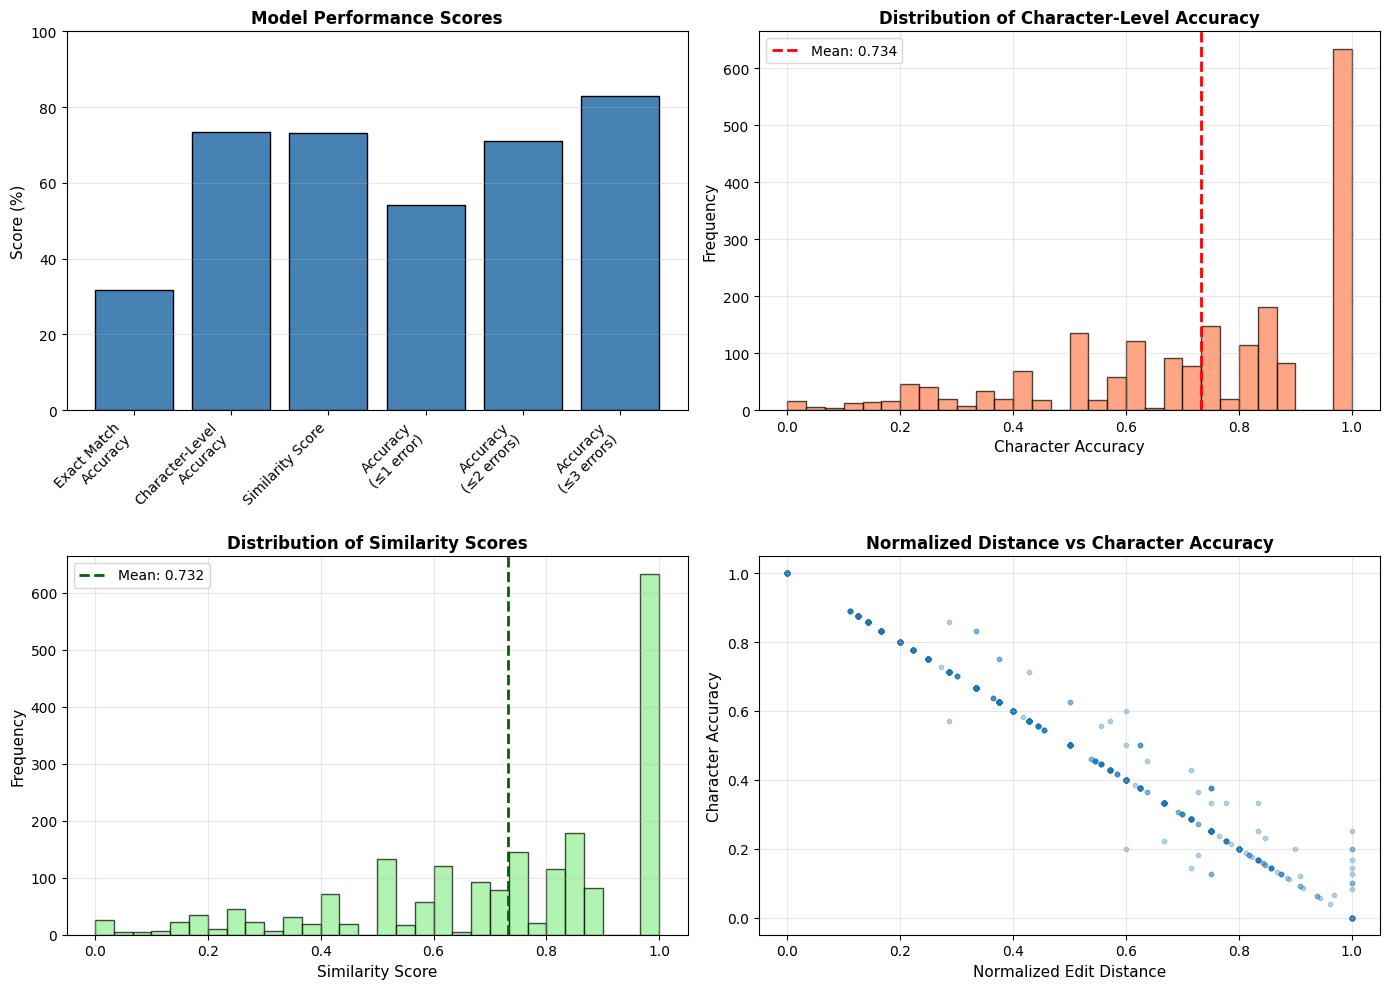

In [20]:
# Visualize the scores
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Score comparison bar chart
scores = {
    'Exact Match\nAccuracy': exact_match_accuracy * 100,
    'Character-Level\nAccuracy': character_accuracy * 100,
    'Similarity Score': avg_similarity * 100,
    'Accuracy\n(≤1 error)': accuracy_within_1 * 100,
    'Accuracy\n(≤2 errors)': accuracy_within_2 * 100,
    'Accuracy\n(≤3 errors)': accuracy_within_3 * 100
}
axes[0, 0].bar(range(len(scores)), list(scores.values()), color='steelblue', edgecolor='black')
axes[0, 0].set_xticks(range(len(scores)))
axes[0, 0].set_xticklabels(list(scores.keys()), rotation=45, ha='right')
axes[0, 0].set_ylabel('Score (%)', fontsize=11)
axes[0, 0].set_title('Model Performance Scores', fontsize=12, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)
axes[0, 0].set_ylim([0, 100])

# 2. Character accuracy distribution
axes[0, 1].hist(df['Char_Accuracy'], bins=30, color='coral', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(character_accuracy, color='red', linestyle='--', linewidth=2, label=f'Mean: {character_accuracy:.3f}')
axes[0, 1].set_xlabel('Character Accuracy', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('Distribution of Character-Level Accuracy', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Similarity score distribution
axes[1, 0].hist(df['Similarity_Score'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(avg_similarity, color='darkgreen', linestyle='--', linewidth=2, label=f'Mean: {avg_similarity:.3f}')
axes[1, 0].set_xlabel('Similarity Score', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].set_title('Distribution of Similarity Scores', fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 4. Normalized distance vs Character accuracy scatter
axes[1, 1].scatter(df['Normalized_Distance'], df['Char_Accuracy'], alpha=0.3, s=10)
axes[1, 1].set_xlabel('Normalized Edit Distance', fontsize=11)
axes[1, 1].set_ylabel('Character Accuracy', fontsize=11)
axes[1, 1].set_title('Normalized Distance vs Character Accuracy', fontsize=12, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


Total bad predictions: 577
Bad predictions by distance threshold (≥3): 577
Bad predictions by char accuracy threshold (<0.5): 317

Sorting by worst performance (highest distance, lowest char accuracy)...

Displaying first 20 worst predictions with their images:



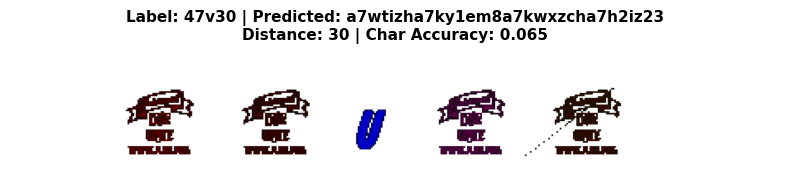

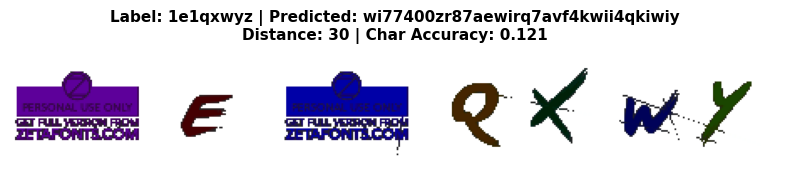

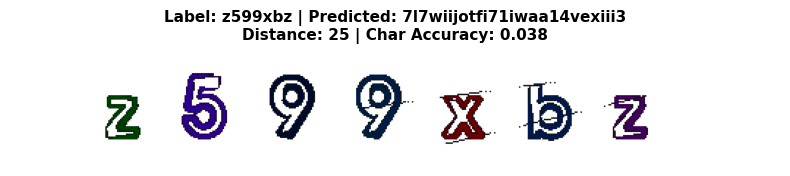

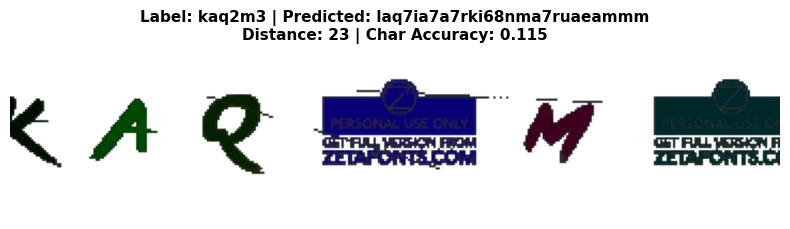

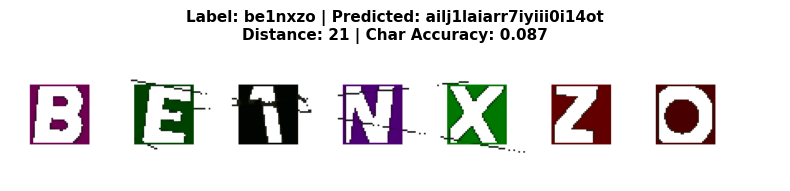

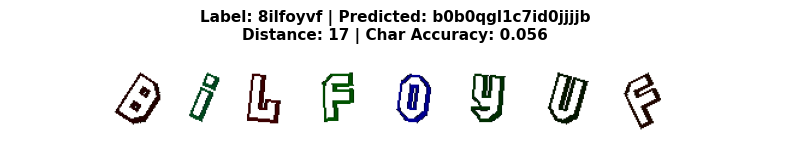

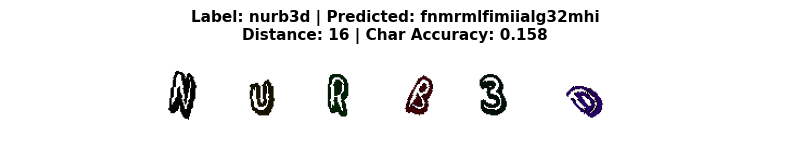

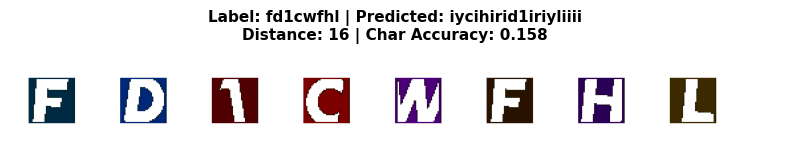

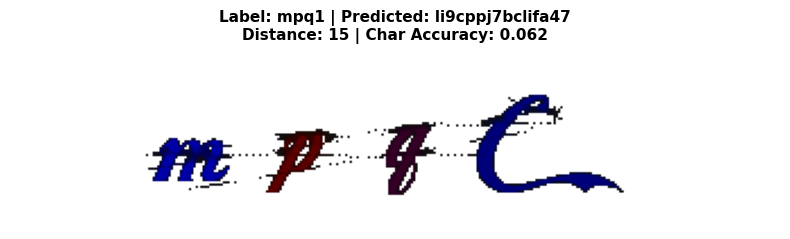

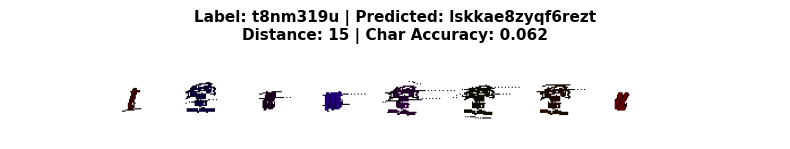

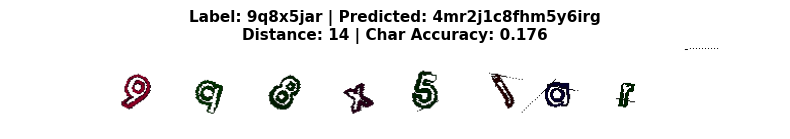

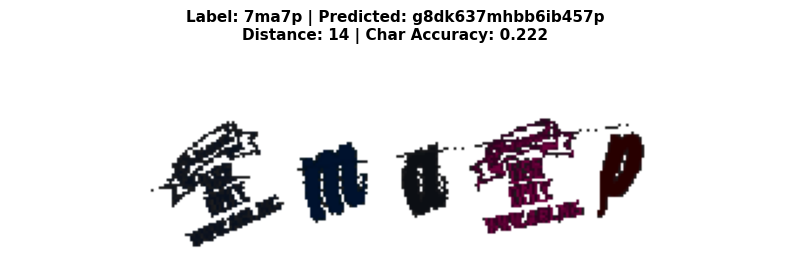

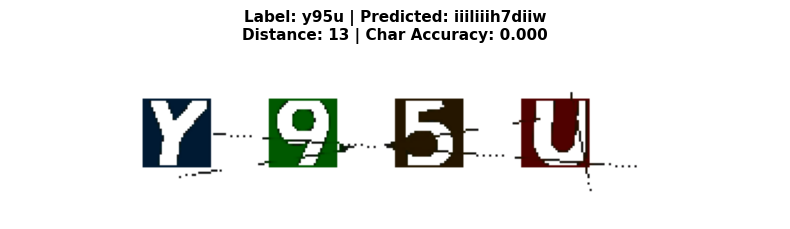

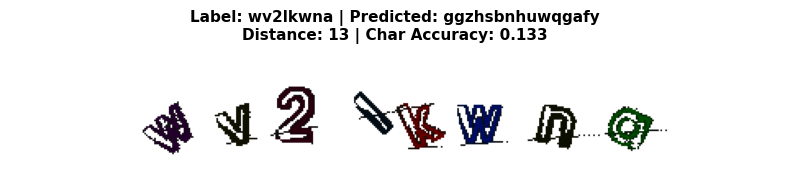

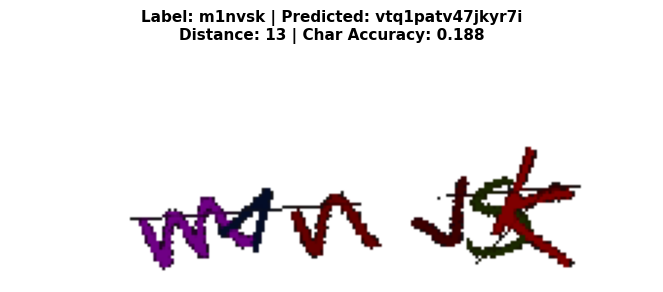

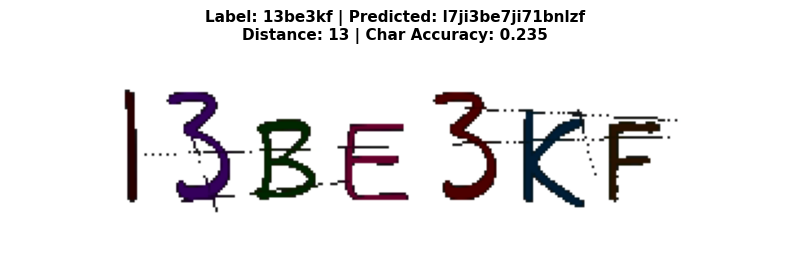

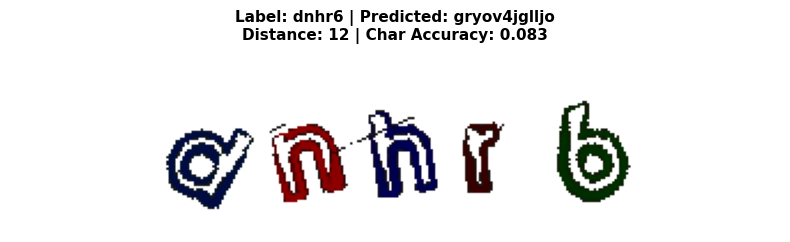

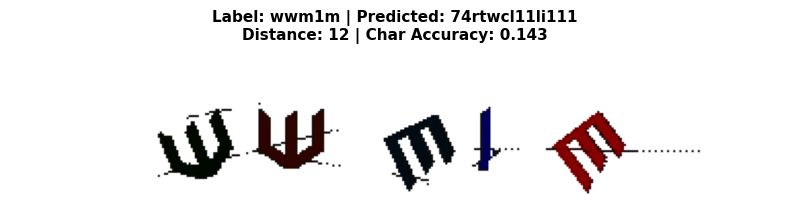

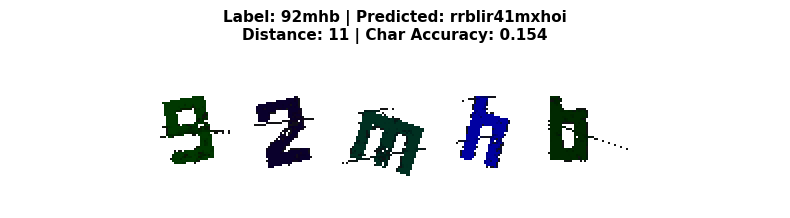

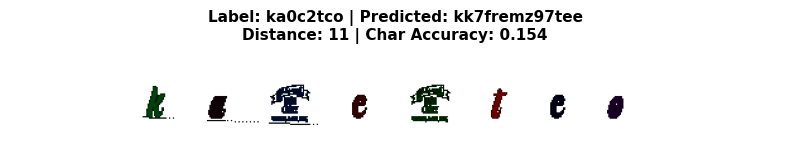


Displayed 20 worst predictions out of 577 total bad predictions


In [21]:
# Bad prediction analysis - visualize images with poor predictions
import os
import cv2
from pathlib import Path
from IPython.display import display, HTML

# Define thresholds for "bad" predictions
DISTANCE_THRESHOLD = 3  # Consider predictions with distance >= 3 as bad
CHAR_ACCURACY_THRESHOLD = 0.5  # Consider predictions with char accuracy < 0.5 as bad

# Filter bad predictions
bad_predictions = df[
    (df['Distance'] >= DISTANCE_THRESHOLD) | (df['Char_Accuracy'] < CHAR_ACCURACY_THRESHOLD)
].copy()

print(f"Total bad predictions: {len(bad_predictions)}")
print(f"Bad predictions by distance threshold (≥{DISTANCE_THRESHOLD}): {len(df[df['Distance'] >= DISTANCE_THRESHOLD])}")
print(f"Bad predictions by char accuracy threshold (<{CHAR_ACCURACY_THRESHOLD}): {len(df[df['Char_Accuracy'] < CHAR_ACCURACY_THRESHOLD])}")
print(f"\nSorting by worst performance (highest distance, lowest char accuracy)...")
bad_predictions = bad_predictions.sort_values(['Distance', 'Char_Accuracy'], ascending=[False, True])

# Path to enhanced contrast images
image_dir = Path("./test/enhanced_contrast")

# Function to find image file for a given label
def find_image_file(label):
    """Find the image file matching the label"""
    # The filename format is: {label}-{something}_cleaned_enhanced.png
    pattern = f"{label}-*_cleaned_enhanced.png"
    matches = list(image_dir.glob(pattern))
    if matches:
        return matches[0]  # Return first match
    return None

# Display bad predictions with images
print(f"\nDisplaying first 20 worst predictions with their images:\n")
print("=" * 80)

# Limit to first 20 for display
display_count = min(20, len(bad_predictions))

for idx, (row_idx, row) in enumerate(bad_predictions.head(display_count).iterrows()):
    label = row['Actual']
    predicted = row['Predicted']
    distance = row['Distance']
    char_acc = row['Char_Accuracy']
    
    # Find the image
    image_path = find_image_file(label)
    
    if image_path and image_path.exists():
        # Read and display the image
        img = cv2.imread(str(image_path))
        if img is not None:
            # Convert BGR to RGB for matplotlib
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            # Create figure
            fig, ax = plt.subplots(1, 1, figsize=(8, 3))
            ax.imshow(img_rgb)
            ax.axis('off')
            ax.set_title(
                f"Label: {label} | Predicted: {predicted}\n"
                f"Distance: {distance} | Char Accuracy: {char_acc:.3f}",
                fontsize=11, fontweight='bold'
            )
            plt.tight_layout()
            plt.show()
    else:
        print(f"⚠️  Image not found for label: {label}")
        print(f"   Predicted: {predicted}, Distance: {distance}, Char Accuracy: {char_acc:.3f}\n")

print(f"\n{'='*80}")
print(f"Displayed {display_count} worst predictions out of {len(bad_predictions)} total bad predictions")

ANALYSIS OF BAD PREDICTIONS

1. Bad Predictions by Actual Captcha Length:
Actual_Length
4     78
5    103
6    104
7    133
8    159
dtype: int64

Average length of bad predictions: 6.33
Average length of all predictions: 6.00

2. Bad Predictions by Distance Range:
  Distance 3-5: 442 cases
  Distance 6-10: 113 cases
  Distance 11-20: 17 cases
  Distance 21+: 5 cases

3. Character Accuracy Distribution for Bad Predictions:
  Mean: 0.409
  Median: 0.429
  Min: 0.000
  Max: 0.750

4. Length Difference Analysis (Predicted - Actual):
Length_Diff
-6      1
-5      1
-4      5
-3     15
-2     37
-1     66
 0    162
 1     80
 2     70
 3     51
Name: count, dtype: int64

  Average length difference: 1.30


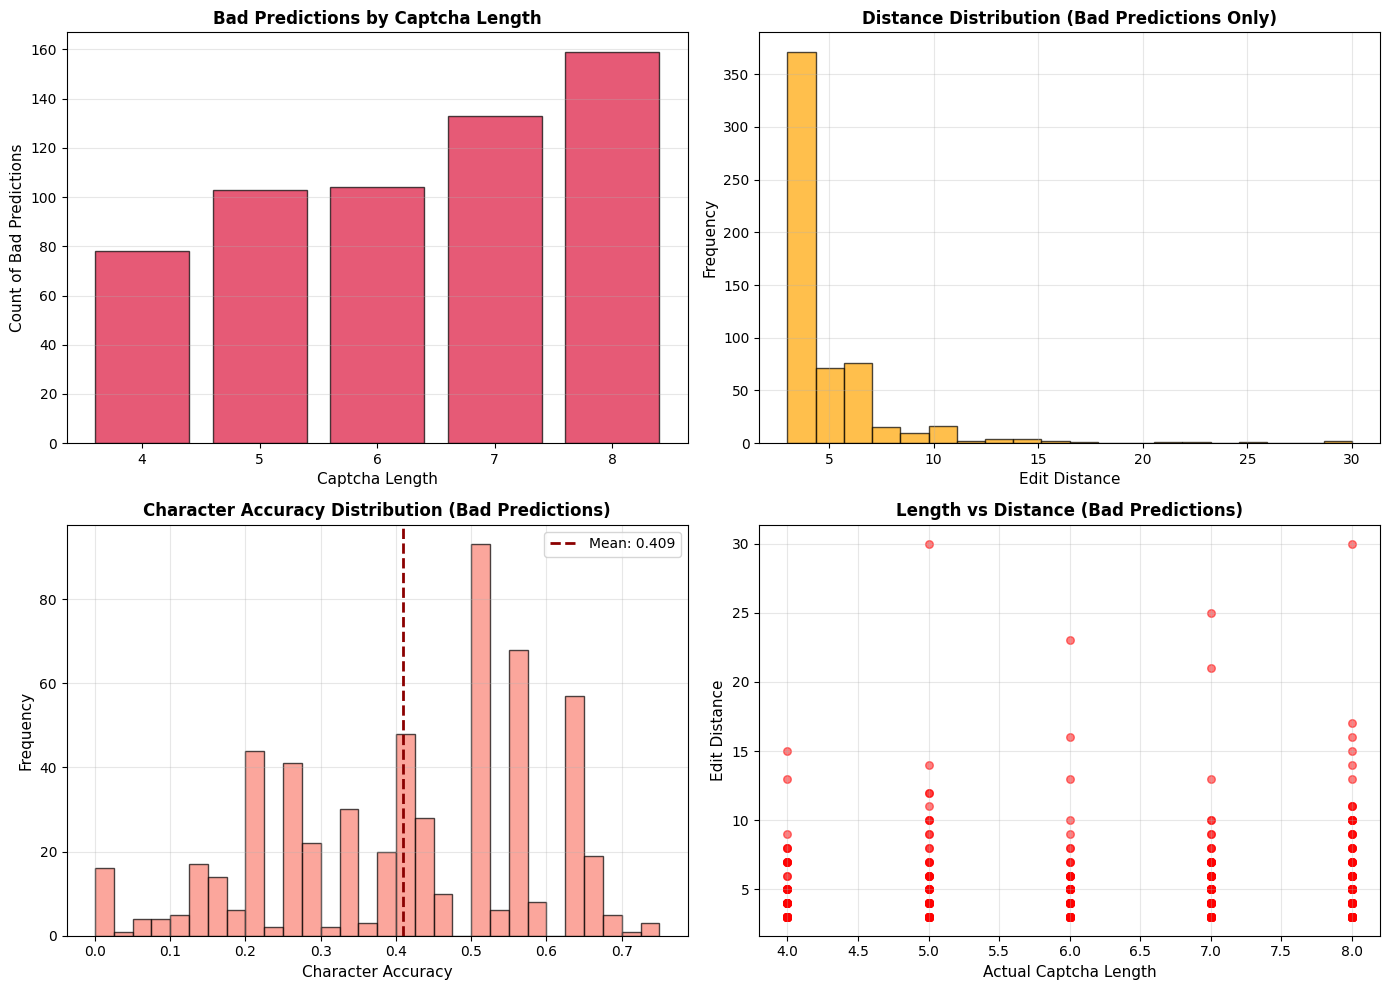

In [22]:
# Analyze patterns in bad predictions
print("=" * 80)
print("ANALYSIS OF BAD PREDICTIONS")
print("=" * 80)

# 1. Bad predictions by length
print("\n1. Bad Predictions by Actual Captcha Length:")
bad_by_length = bad_predictions.groupby('Actual_Length').size().sort_index()
print(bad_by_length)
print(f"\nAverage length of bad predictions: {bad_predictions['Actual_Length'].mean():.2f}")
print(f"Average length of all predictions: {df['Actual_Length'].mean():.2f}")

# 2. Bad predictions by distance range
print("\n2. Bad Predictions by Distance Range:")
distance_ranges = [
    (3, 5, "3-5"),
    (6, 10, "6-10"),
    (11, 20, "11-20"),
    (21, 100, "21+")
]
for low, high, label in distance_ranges:
    count = len(bad_predictions[(bad_predictions['Distance'] >= low) & (bad_predictions['Distance'] <= high)])
    print(f"  Distance {label}: {count} cases")

# 3. Character accuracy distribution for bad predictions
print("\n3. Character Accuracy Distribution for Bad Predictions:")
print(f"  Mean: {bad_predictions['Char_Accuracy'].mean():.3f}")
print(f"  Median: {bad_predictions['Char_Accuracy'].median():.3f}")
print(f"  Min: {bad_predictions['Char_Accuracy'].min():.3f}")
print(f"  Max: {bad_predictions['Char_Accuracy'].max():.3f}")

# 4. Length difference analysis
print("\n4. Length Difference Analysis (Predicted - Actual):")
bad_length_diff = bad_predictions['Length_Diff'].value_counts().sort_index()
print(bad_length_diff.head(10))
print(f"\n  Average length difference: {bad_predictions['Length_Diff'].mean():.2f}")

# 5. Visualize bad predictions distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Bad predictions by length
axes[0, 0].bar(bad_by_length.index, bad_by_length.values, color='crimson', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Captcha Length', fontsize=11)
axes[0, 0].set_ylabel('Count of Bad Predictions', fontsize=11)
axes[0, 0].set_title('Bad Predictions by Captcha Length', fontsize=12, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

# Distance distribution for bad predictions
axes[0, 1].hist(bad_predictions['Distance'], bins=20, color='orange', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Edit Distance', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('Distance Distribution (Bad Predictions Only)', fontsize=12, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# Character accuracy distribution for bad predictions
axes[1, 0].hist(bad_predictions['Char_Accuracy'], bins=30, color='salmon', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(bad_predictions['Char_Accuracy'].mean(), color='darkred', 
                    linestyle='--', linewidth=2, label=f'Mean: {bad_predictions["Char_Accuracy"].mean():.3f}')
axes[1, 0].set_xlabel('Character Accuracy', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].set_title('Character Accuracy Distribution (Bad Predictions)', fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Length vs Distance scatter for bad predictions
axes[1, 1].scatter(bad_predictions['Actual_Length'], bad_predictions['Distance'], 
                    alpha=0.5, s=30, color='red')
axes[1, 1].set_xlabel('Actual Captcha Length', fontsize=11)
axes[1, 1].set_ylabel('Edit Distance', fontsize=11)
axes[1, 1].set_title('Length vs Distance (Bad Predictions)', fontsize=12, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)


In [23]:
# Custom analysis: View predictions by specific criteria
# You can modify these parameters to investigate specific failure modes

# Option 1: View predictions with specific distance values
def view_by_distance(distance_value, max_display=10):
    """View predictions with a specific distance value"""
    filtered = df[df['Distance'] == distance_value].copy()
    filtered = filtered.sort_values('Char_Accuracy', ascending=True)
    
    print(f"Predictions with Distance = {distance_value} (showing {min(max_display, len(filtered))} of {len(filtered)}):")
    print("=" * 80)
    
    for idx, (row_idx, row) in enumerate(filtered.head(max_display).iterrows()):
        label = row['Actual']
        predicted = row['Predicted']
        char_acc = row['Char_Accuracy']
        
        image_path = find_image_file(label)
        
        if image_path and image_path.exists():
            img = cv2.imread(str(image_path))
            if img is not None:
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                fig, ax = plt.subplots(1, 1, figsize=(8, 3))
                ax.imshow(img_rgb)
                ax.axis('off')
                ax.set_title(
                    f"Label: {label} | Predicted: {predicted} | Char Acc: {char_acc:.3f}",
                    fontsize=11, fontweight='bold'
                )
                plt.tight_layout()
                plt.show()

# Option 2: View predictions with very high distance (worst cases)
def view_worst_cases(max_display=10):
    """View the worst predictions"""
    worst = df.nlargest(max_display, 'Distance')
    print(f"Top {max_display} worst predictions (by distance):")
    print("=" * 80)
    
    for idx, (row_idx, row) in enumerate(worst.iterrows()):
        label = row['Actual']
        predicted = row['Predicted']
        distance = row['Distance']
        char_acc = row['Char_Accuracy']
        
        image_path = find_image_file(label)
        
        if image_path and image_path.exists():
            img = cv2.imread(str(image_path))
            if img is not None:
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                fig, ax = plt.subplots(1, 1, figsize=(8, 3))
                ax.imshow(img_rgb)
                ax.axis('off')
                ax.set_title(
                    f"Label: {label} | Predicted: {predicted}\n"
                    f"Distance: {distance} | Char Acc: {char_acc:.3f}",
                    fontsize=11, fontweight='bold', color='red'
                )
                plt.tight_layout()
                plt.show()

# Option 3: View predictions by length
def view_by_length(length_value, max_display=10):
    """View bad predictions for a specific captcha length"""
    filtered = bad_predictions[bad_predictions['Actual_Length'] == length_value].copy()
    filtered = filtered.sort_values(['Distance', 'Char_Accuracy'], ascending=[False, True])
    
    print(f"Bad predictions with Length = {length_value} (showing {min(max_display, len(filtered))} of {len(filtered)}):")
    print("=" * 80)
    
    for idx, (row_idx, row) in enumerate(filtered.head(max_display).iterrows()):
        label = row['Actual']
        predicted = row['Predicted']
        distance = row['Distance']
        char_acc = row['Char_Accuracy']
        
        image_path = find_image_file(label)
        
        if image_path and image_path.exists():
            img = cv2.imread(str(image_path))
            if img is not None:
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                fig, ax = plt.subplots(1, 1, figsize=(8, 3))
                ax.imshow(img_rgb)
                ax.axis('off')
                ax.set_title(
                    f"Label: {label} | Predicted: {predicted}\n"
                    f"Distance: {distance} | Char Acc: {char_acc:.3f}",
                    fontsize=11, fontweight='bold'
                )
                plt.tight_layout()
                plt.show()

# Example usage (uncomment to run):
# view_by_distance(5, max_display=5)  # View predictions with distance = 5
# view_worst_cases(max_display=5)     # View top 5 worst predictions
# view_by_length(8, max_display=5)    # View bad predictions with length 8


Predictions with Distance = 5 (showing 5 of 71):


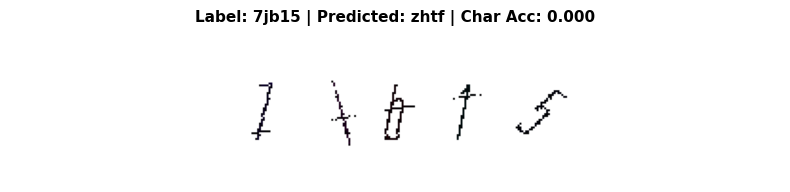

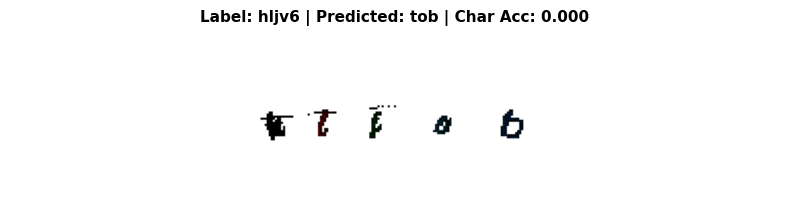

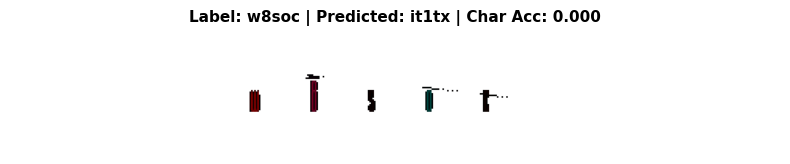

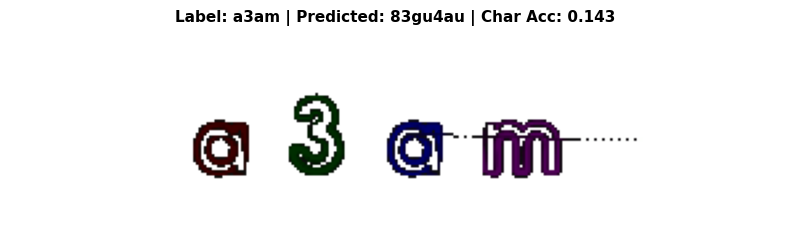

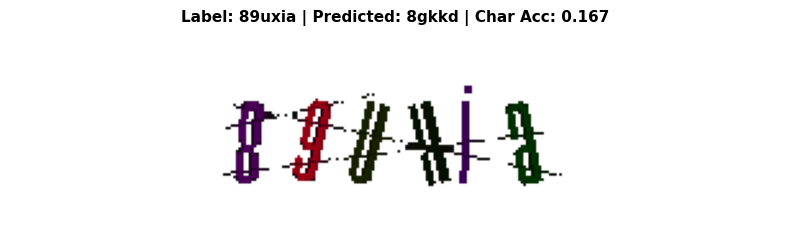

In [ ]:
view_by_distance(5, max_display=5)  # View predictions with distance = 5 

Top 5 worst predictions (by distance):


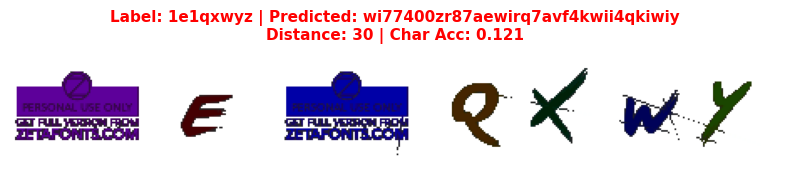

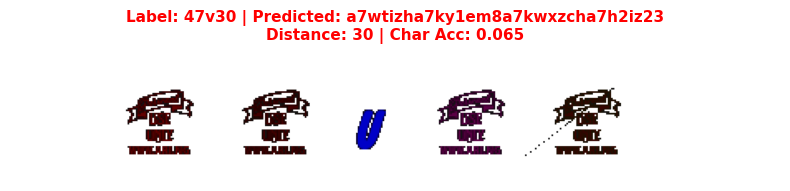

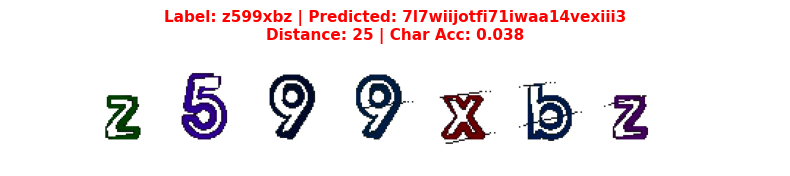

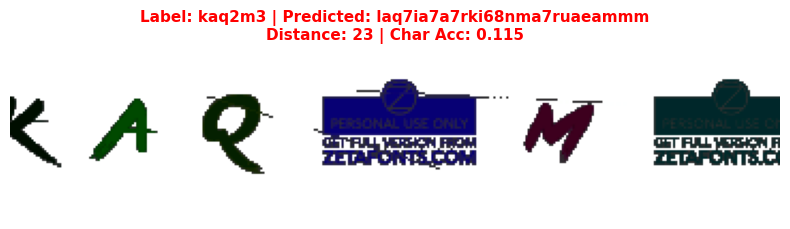

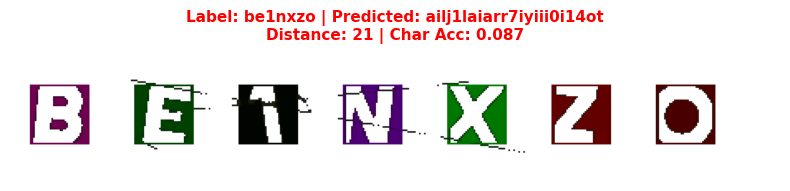

In [ ]:
view_worst_cases(max_display=5)


Bad predictions with Length = 8 (showing 5 of 159):


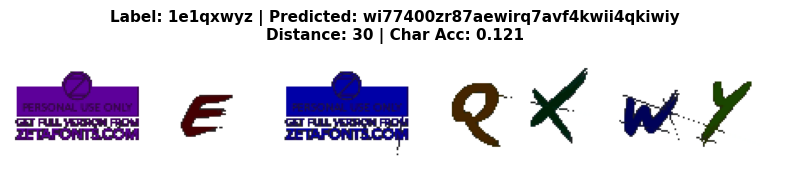

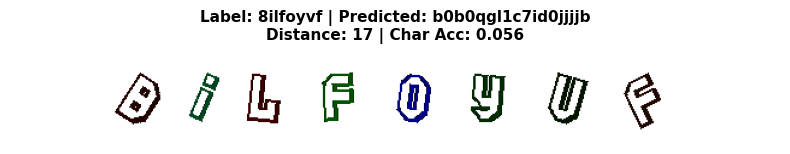

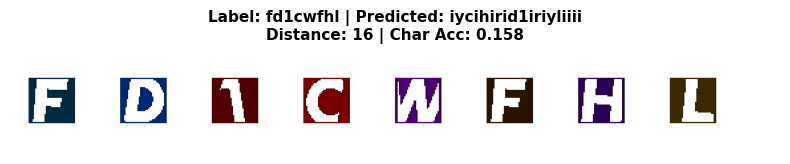

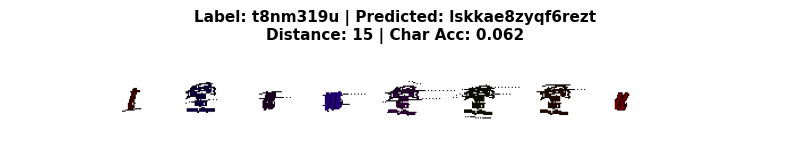

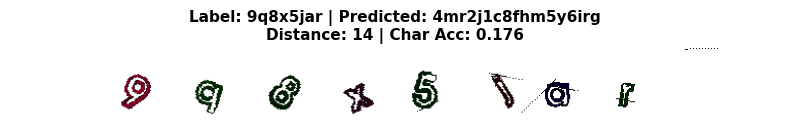

In [26]:
view_by_length(8, max_display=5)  

In [24]:
# Character confusion matrix heatmap with ALL cells annotated

from collections import defaultdict
from difflib import SequenceMatcher

def build_character_confusion_matrix(df, use_equal_length_only=False):
    """
    Build a character-level confusion matrix from actual and predicted strings.
    
    Args:
        df: DataFrame with 'Actual' and 'Predicted' columns
        use_equal_length_only: If True, only use cases where lengths match.
                              If False, use character-level alignment for all cases.
    
    Returns:
        confusion_matrix: Dictionary of dictionaries {true_char: {pred_char: count}}
        all_chars: Sorted list of all unique characters
    """
    confusion_matrix = defaultdict(lambda: defaultdict(int))
    all_chars = set()
    
    if use_equal_length_only:
        # Only use cases where lengths match
        filtered_df = df[df['Actual_Length'] == df['Predicted_Length']]
        print(f"Using {len(filtered_df)} cases with equal lengths (out of {len(df)} total)")
    else:
        # Use all cases with character-level alignment
        filtered_df = df
        print(f"Using all {len(filtered_df)} cases with character-level alignment")
    
    for idx, row in filtered_df.iterrows():
        actual = row['Actual']
        predicted = row['Predicted']
        
        if use_equal_length_only:
            # Simple position-by-position comparison
            for i in range(len(actual)):
                true_char = actual[i]
                pred_char = predicted[i] if i < len(predicted) else 'MISSING'
                confusion_matrix[true_char][pred_char] += 1
                all_chars.add(true_char)
                all_chars.add(pred_char)
        else:
            # Simple position-by-position alignment up to minimum length
            # This is more intuitive for confusion matrices - aligns characters at same positions
            min_len = min(len(actual), len(predicted))
            
            # Compare characters at each position up to minimum length
            for i in range(min_len):
                true_char = actual[i]
                pred_char = predicted[i]
                confusion_matrix[true_char][pred_char] += 1
                all_chars.add(true_char)
                all_chars.add(pred_char)
            
            # Handle extra characters in actual (prediction is too short)
            # These are treated as "MISSING" predictions
            for i in range(min_len, len(actual)):
                true_char = actual[i]
                confusion_matrix[true_char]['MISSING'] += 1
                all_chars.add(true_char)
                all_chars.add('MISSING')
            
            # Handle extra characters in predicted (prediction is too long)
            # These are treated as "EXTRA" predictions
            for i in range(min_len, len(predicted)):
                pred_char = predicted[i]
                confusion_matrix['EXTRA'][pred_char] += 1
                all_chars.add('EXTRA')
                all_chars.add(pred_char)
    
    # Remove 'EXTRA' and 'MISSING' from main character list for cleaner visualization
    clean_chars = sorted([c for c in all_chars if c not in ['EXTRA', 'MISSING']])
    return confusion_matrix, clean_chars

# Build confusion matrix (using all data with alignment)
confusion_matrix, all_chars = build_character_confusion_matrix(df, use_equal_length_only=False)

# Also build one with equal lengths only for comparison
confusion_matrix_equal, _ = build_character_confusion_matrix(df, use_equal_length_only=True)

print(f"\nUnique characters found: {len(all_chars)}")
print(f"Characters: {''.join(all_chars)}")

Using all 1968 cases with character-level alignment
Using 1340 cases with equal lengths (out of 1968 total)

Unique characters found: 36
Characters: 0123456789abcdefghijklmnopqrstuvwxyz


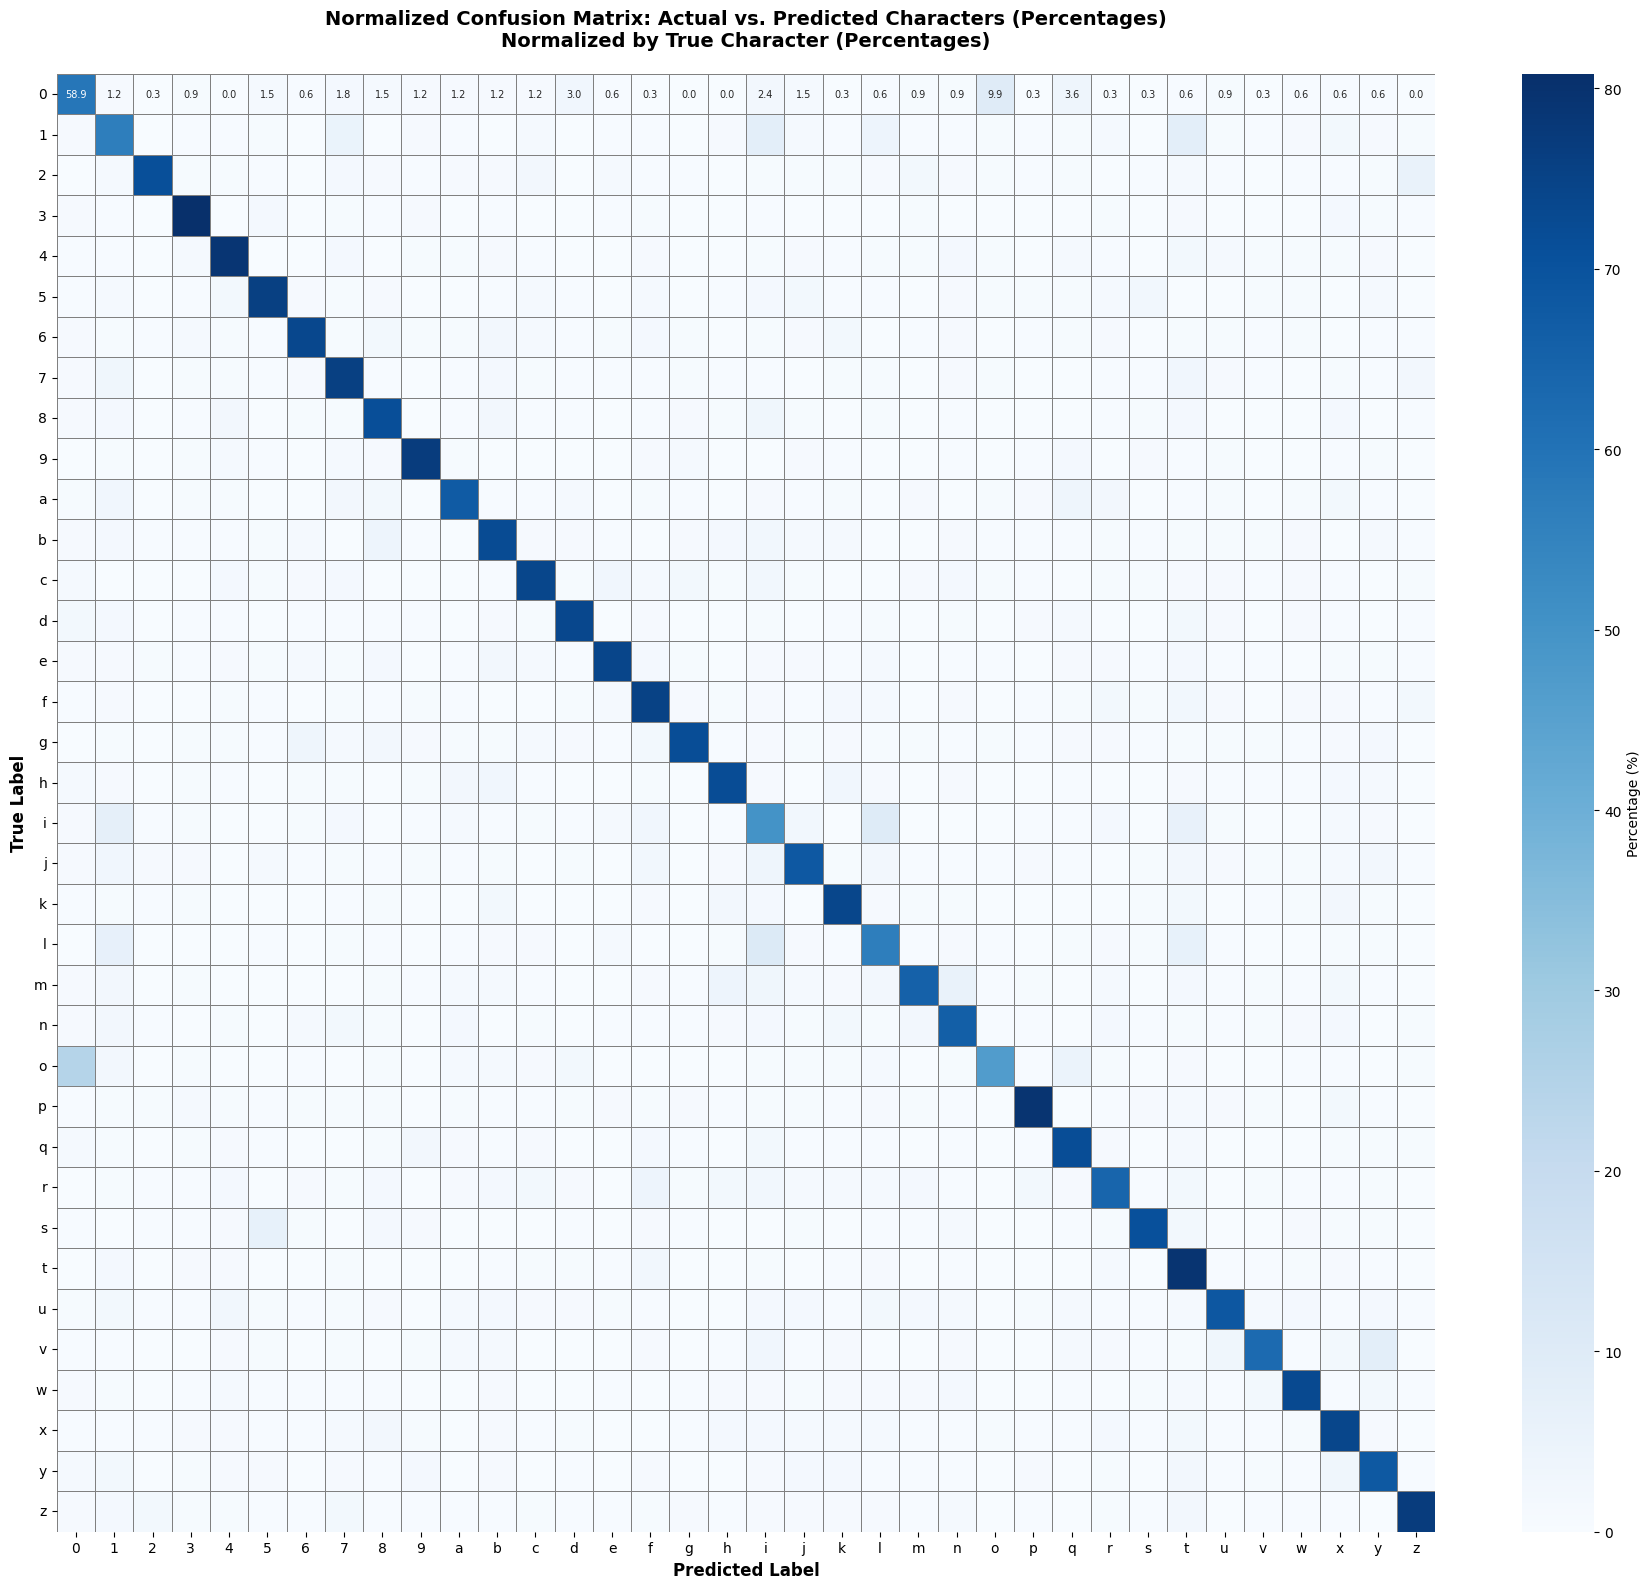


CHARACTER-LEVEL PERFORMANCE STATISTICS

Total character predictions: 11,503
Correct character predictions: 8,033
Character-level accuracy: 69.83%

Per-character accuracy:

Top 10 most accurate characters:
  '3': 80.80% (261/323)
  't': 79.47% (271/341)
  'p': 79.29% (245/309)
  '4': 79.21% (240/303)
  'z': 76.87% (236/307)
  '9': 76.80% (245/319)
  '5': 75.99% (231/304)
  '7': 75.85% (223/294)
  'f': 75.33% (229/304)
  'e': 74.33% (223/300)

Bottom 10 least accurate characters:
  'a': 67.44% (232/344)
  'n': 66.08% (226/342)
  'm': 65.58% (202/308)
  'r': 64.38% (188/292)
  'v': 62.65% (208/332)
  '0': 58.86% (196/333)
  'l': 56.72% (190/335)
  '1': 56.67% (170/300)
  'i': 50.15% (170/339)
  'o': 47.01% (157/334)

Most confused character pairs (excluding correct predictions):
  'o' → '0': 82 times (0.713%)
  'l' → 'i': 37 times (0.322%)
  'i' → 'l': 35 times (0.304%)
  '0' → 'o': 33 times (0.287%)
  'v' → 'y': 27 times (0.235%)
  'i' → '1': 25 times (0.217%)
  '1' → 'i': 24 times (0.2

In [25]:
# Create normalized confusion matrix with percentages
def create_confusion_matrix_heatmap(confusion_matrix, all_chars, title="Character Confusion Matrix", 
                                    normalize=True, figsize=(16, 14), fontsize=8):
    """
    Create a normalized confusion matrix heatmap with percentages.
    
    Args:
        confusion_matrix: Dictionary of dictionaries {true_char: {pred_char: count}}
        all_chars: List of all unique characters to include
        title: Title for the plot
        normalize: If True, normalize by row (true character) to show percentages
        figsize: Figure size
        fontsize: Font size for annotations
    """
    # Create matrix
    matrix = np.zeros((len(all_chars), len(all_chars)))
    
    # Fill matrix with counts
    for i, true_char in enumerate(all_chars):
        for j, pred_char in enumerate(all_chars):
            matrix[i, j] = confusion_matrix[true_char][pred_char]
    
    # Normalize by row (true character) to get percentages
    if normalize:
        row_sums = matrix.sum(axis=1, keepdims=True)
        row_sums[row_sums == 0] = 1  # Avoid division by zero
        matrix_normalized = (matrix / row_sums) * 100
        matrix_display = matrix_normalized
        fmt = '.1f'
        label = 'Percentage (%)'
    else:
        matrix_display = matrix
        fmt = 'd'
        label = 'Count'
    
    # Create heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(
        matrix_display,
        xticklabels=all_chars,
        yticklabels=all_chars,
        annot=True,
        fmt=fmt,
        cmap='Blues',
        cbar_kws={'label': label},
        square=False,
        linewidths=0.5,
        linecolor='gray',
        annot_kws={'size': fontsize}
    )
    
    plt.title(f'{title}\n{"Normalized by True Character (Percentages)" if normalize else "Raw Counts"}', 
              fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
    plt.ylabel('True Label', fontsize=12, fontweight='bold')
    plt.xticks(rotation=0, fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print("\n" + "="*80)
    print("CHARACTER-LEVEL PERFORMANCE STATISTICS")
    print("="*80)
    
    total_chars = matrix.sum()
    correct_chars = np.trace(matrix)
    accuracy = (correct_chars / total_chars * 100) if total_chars > 0 else 0
    
    print(f"\nTotal character predictions: {int(total_chars):,}")
    print(f"Correct character predictions: {int(correct_chars):,}")
    print(f"Character-level accuracy: {accuracy:.2f}%")
    
    # Per-character accuracy
    print("\nPer-character accuracy:")
    char_accuracies = []
    for i, char in enumerate(all_chars):
        char_total = matrix[i, :].sum()
        char_correct = matrix[i, i]
        char_acc = (char_correct / char_total * 100) if char_total > 0 else 0
        char_accuracies.append((char, char_acc, int(char_total), int(char_correct)))
    
    # Sort by accuracy
    char_accuracies.sort(key=lambda x: x[1], reverse=True)
    
    print("\nTop 10 most accurate characters:")
    for char, acc, total, correct in char_accuracies[:10]:
        print(f"  '{char}': {acc:.2f}% ({correct}/{total})")
    
    print("\nBottom 10 least accurate characters:")
    for char, acc, total, correct in char_accuracies[-10:]:
        print(f"  '{char}': {acc:.2f}% ({correct}/{total})")
    
    # Most confused pairs
    print("\nMost confused character pairs (excluding correct predictions):")
    confusion_pairs = []
    for i, true_char in enumerate(all_chars):
        for j, pred_char in enumerate(all_chars):
            if i != j and matrix[i, j] > 0:
                confusion_pairs.append((true_char, pred_char, int(matrix[i, j])))
    
    confusion_pairs.sort(key=lambda x: x[2], reverse=True)
    for true_char, pred_char, count in confusion_pairs[:15]:
        percentage = (count / matrix.sum() * 100) if matrix.sum() > 0 else 0
        print(f"  '{true_char}' → '{pred_char}': {count} times ({percentage:.3f}%)")
    
    print("="*80)

# Create heatmap with percentages (normalized by true character)
create_confusion_matrix_heatmap(confusion_matrix, all_chars, 
                                title="Normalized Confusion Matrix: Actual vs. Predicted Characters (Percentages)",
                                normalize=True, figsize=(18, 16), fontsize=7)


COMPARISON: All Data vs. Equal-Length Only


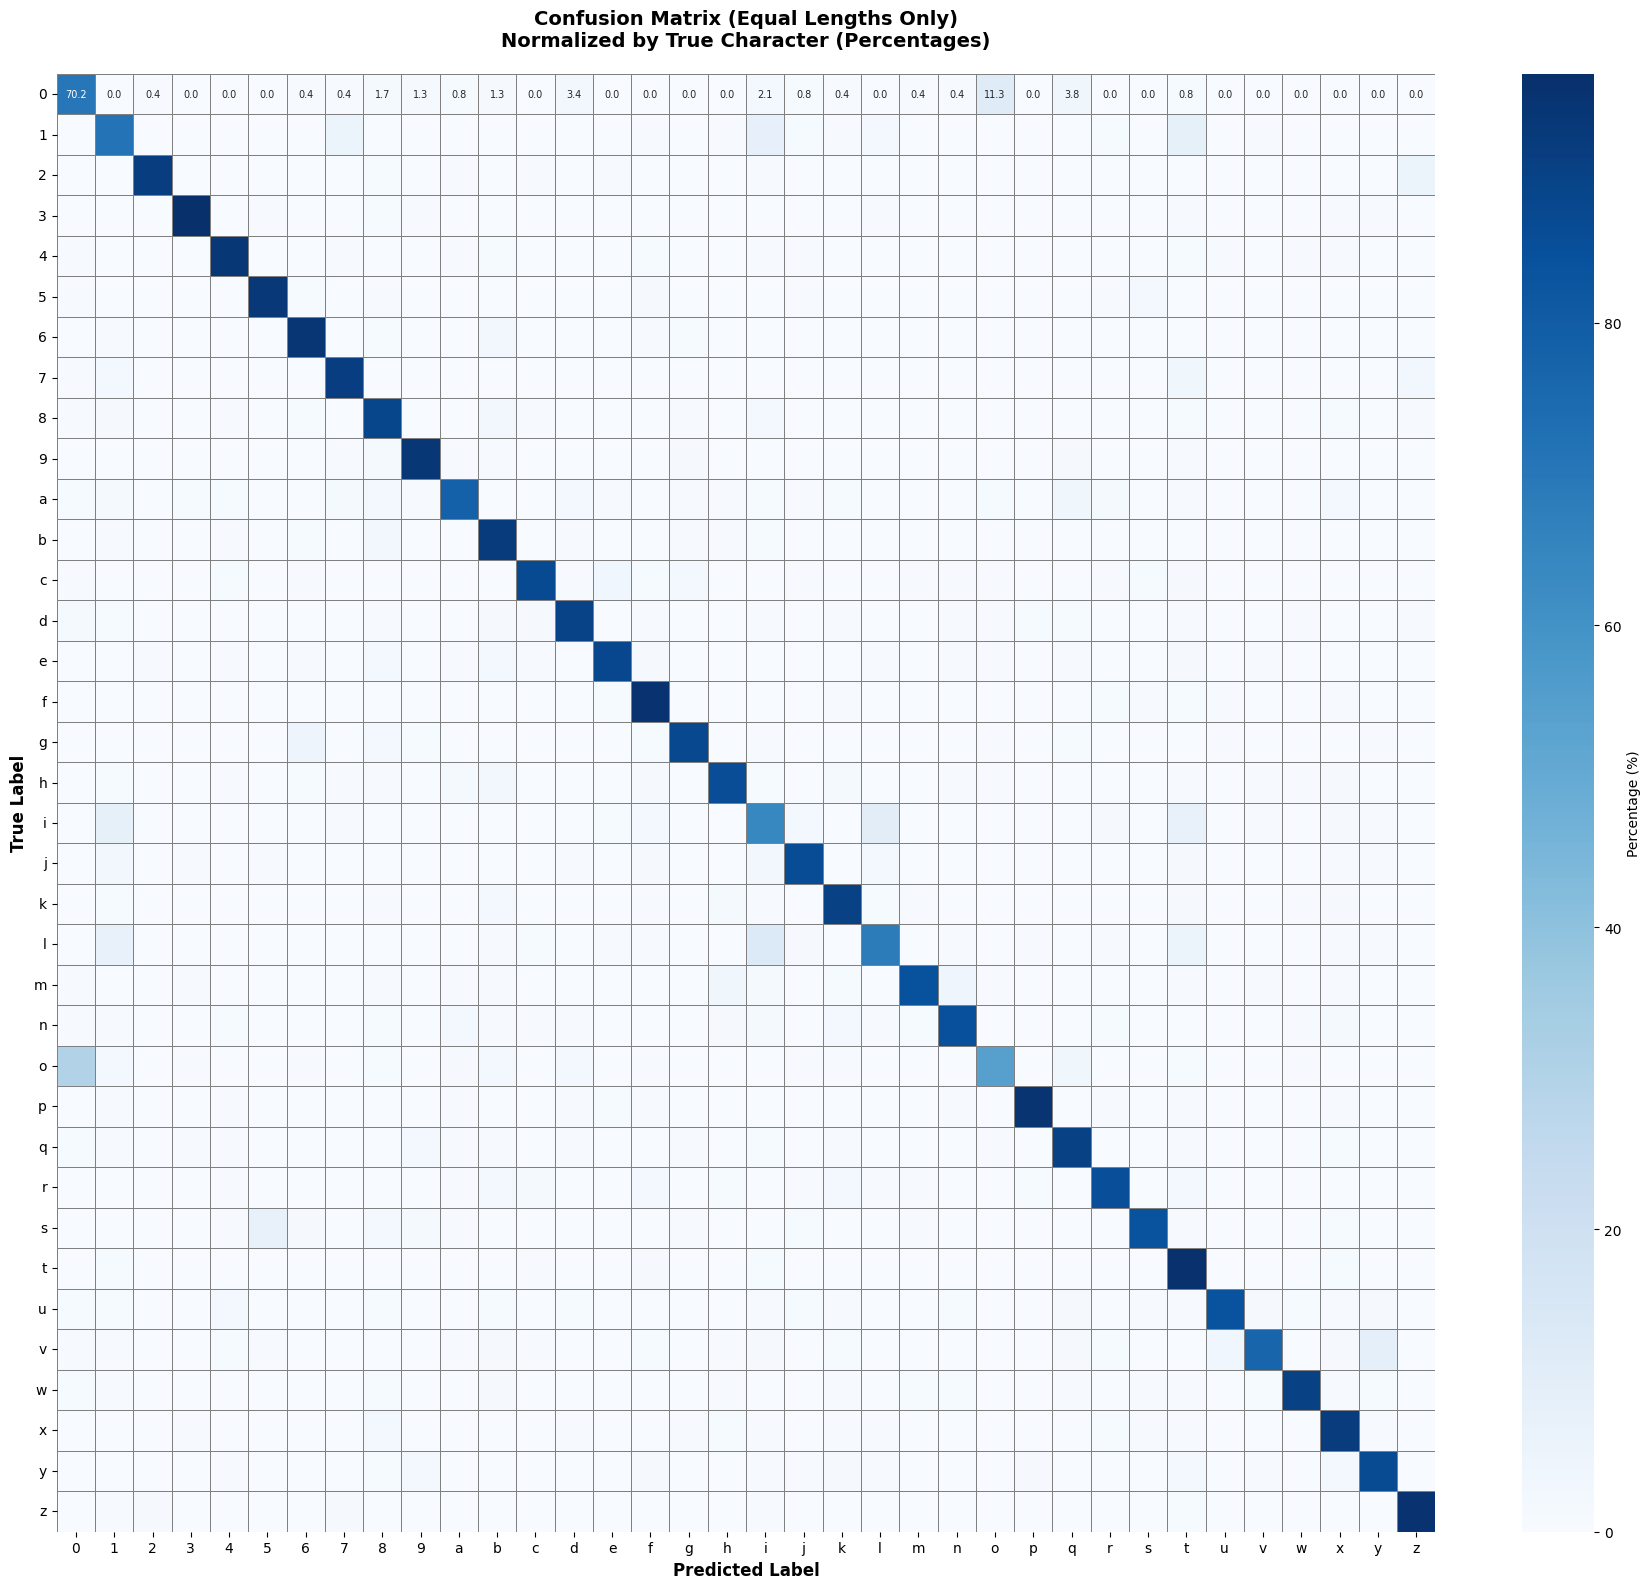


CHARACTER-LEVEL PERFORMANCE STATISTICS

Total character predictions: 7,943
Correct character predictions: 6,801
Character-level accuracy: 85.62%

Per-character accuracy:

Top 10 most accurate characters:
  '3': 96.48% (219/227)
  't': 95.95% (237/247)
  'f': 95.10% (194/204)
  'z': 95.07% (193/203)
  'p': 94.86% (203/214)
  '6': 94.00% (188/200)
  '4': 93.72% (209/223)
  '9': 93.69% (208/222)
  '5': 93.24% (193/207)
  'b': 92.31% (192/208)

Bottom 10 least accurate characters:
  'm': 84.26% (166/197)
  's': 83.88% (203/242)
  'u': 83.87% (182/217)
  'a': 78.26% (198/253)
  'v': 76.67% (184/240)
  '1': 71.57% (141/197)
  '0': 70.17% (167/238)
  'l': 68.57% (168/245)
  'i': 64.19% (147/229)
  'o': 53.91% (131/243)

Most confused character pairs (excluding correct predictions):
  'o' → '0': 74 times (0.932%)
  'l' → 'i': 33 times (0.415%)
  '0' → 'o': 27 times (0.340%)
  'i' → 'l': 24 times (0.302%)
  'v' → 'y': 21 times (0.264%)
  'i' → '1': 19 times (0.239%)
  'l' → '1': 18 times (0.22

In [26]:
# Compare: Using all data vs. equal-length only
print("="*80)
print("COMPARISON: All Data vs. Equal-Length Only")
print("="*80)

# Create heatmap for equal-length only approach
create_confusion_matrix_heatmap(confusion_matrix_equal, all_chars, 
                                title="Confusion Matrix (Equal Lengths Only)",
                                normalize=True, figsize=(18, 16), fontsize=7)
